In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit

In [2]:
lats =  np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs =  np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates=list(lat_lngs)

In [4]:
# Use the print()function to display latitude and longitude
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

-84.32470299077244 54.48507314709252
-33.81872757101926 28.78934894576261
32.369174783321995 166.11602894760995
73.82074011660399 75.79137736799109
23.990366794249596 -58.25031406609149
-18.88404644374306 -170.91016440344745
67.72045513142126 -144.22246214482595
-54.263985381407146 -150.42373482577895
12.702626713678711 55.25023011373807
37.65132186574199 45.54386915877856
84.16651264358683 -119.16280519869136
-53.825738746908804 -100.53788423418524
44.86214646468554 -75.01880182610932
31.1414051037724 171.56114514573466
63.10353238370561 30.54085503899273
30.7273086001601 -146.19445702487843
-34.877467072256444 -134.19755508385657
-16.464734985262297 -151.40239084192388
43.5492429076632 -110.01055631524578
-80.53602589714441 100.55941976732299
-30.99454442716968 -19.590454941229694
-50.72258477405757 104.8792556632601
31.39901062053096 -110.02247645659718
51.432380743165425 123.82941581309899
-85.19410752931707 61.732602303681915
20.918041331668874 49.79051956290439
-36.21656625684354

In [5]:
from citipy import citipy


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [7]:
# Import request library
import requests
# Import API key
from config import weather_api_key

In [8]:
# Starting URl for Weather map API call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an endpoint for a city.



#city_url = url + "&q=" + "Boston"
#print(city_url)

In [10]:
# Import time library and the datetime module

import time

from datetime import datetime

In [11]:
# Initialize an empty list to hold weather data

city_data = []

#Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | alofi
Processing Record 7 of Set 1 | fairbanks
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | bereda
Processing Record 10 of Set 1 | azar shahr
City not found. Skipping...
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | massena
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | lieksa
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | uturoa
Processing Record 19 of Set 1 | jackson
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | busselton
Processing Record 

Processing Record 38 of Set 4 | gat
Processing Record 39 of Set 4 | guerrero negro
Processing Record 40 of Set 4 | antofagasta
Processing Record 41 of Set 4 | daru
Processing Record 42 of Set 4 | kozhva
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | oranjemund
Processing Record 45 of Set 4 | provideniya
Processing Record 46 of Set 4 | port hedland
Processing Record 47 of Set 4 | george town
Processing Record 48 of Set 4 | mahebourg
Processing Record 49 of Set 4 | salalah
Processing Record 50 of Set 4 | payakumbuh
Processing Record 1 of Set 5 | ankang
Processing Record 2 of Set 5 | almaznyy
Processing Record 3 of Set 5 | zaraza
Processing Record 4 of Set 5 | faanui
Processing Record 5 of Set 5 | revda
Processing Record 6 of Set 5 | majene
Processing Record 7 of Set 5 | hambantota
Processing Record 8 of Set 5 | hirara
Processing Record 9 of Set 5 | sao filipe
Processing Record 10 of Set 5 | tiksi
Processing Record 11 of Set 5 | airai
Processing Record 12 of Set 

Processing Record 30 of Set 8 | mangaluru
Processing Record 31 of Set 8 | pacific grove
Processing Record 32 of Set 8 | barpeta
Processing Record 33 of Set 8 | bell ville
Processing Record 34 of Set 8 | areosa
Processing Record 35 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 8 | waingapu
Processing Record 37 of Set 8 | kaseda
Processing Record 38 of Set 8 | pervouralsk
Processing Record 39 of Set 8 | san quintin
Processing Record 40 of Set 8 | nabire
Processing Record 41 of Set 8 | oriximina
Processing Record 42 of Set 8 | bara
Processing Record 43 of Set 8 | monrovia
Processing Record 44 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 45 of Set 8 | mbour
Processing Record 46 of Set 8 | kuusamo
Processing Record 47 of Set 8 | los llanos de aridane
Processing Record 48 of Set 8 | nguiu
City not found. Skipping...
Processing Record 49 of Set 8 | vilyuysk
Processing Record 50 of Set 8 | iqaluit
Processing Record 1 of Set 9 | pozo colorado
P

Processing Record 19 of Set 12 | namie
Processing Record 20 of Set 12 | san andres
Processing Record 21 of Set 12 | rawson
Processing Record 22 of Set 12 | kazachinskoye
Processing Record 23 of Set 12 | callaway
Processing Record 24 of Set 12 | balad
Processing Record 25 of Set 12 | phan thiet
Processing Record 26 of Set 12 | zeya
Processing Record 27 of Set 12 | harlingen
Processing Record 28 of Set 12 | umm lajj
Processing Record 29 of Set 12 | kismayo
Processing Record 30 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 31 of Set 12 | forrest city
Processing Record 32 of Set 12 | sandusky
Processing Record 33 of Set 12 | general pico
Processing Record 34 of Set 12 | nizhniy odes
Processing Record 35 of Set 12 | ust-ishim
Processing Record 36 of Set 12 | kushiro
Processing Record 37 of Set 12 | penzance
Processing Record 38 of Set 12 | hasaki
Processing Record 39 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 40 of Set 12 | atambua
Processing Record

In [12]:
len(city_data)

552

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,72.18,81,0,8.01,ZA,2022-10-02 13:42:40
1,East London,-33.0153,27.9116,74.34,73,0,17.27,ZA,2022-10-02 13:42:40
2,Severo-Kurilsk,50.6789,156.1250,43.83,67,21,11.07,RU,2022-10-02 13:42:40
3,Dikson,73.5069,80.5464,29.05,83,86,17.47,RU,2022-10-02 13:42:41
4,Codrington,-38.2667,141.9667,46.51,91,100,6.58,AU,2022-10-02 13:42:41
5,Alofi,-19.0595,-169.9187,71.49,78,34,8.05,NU,2022-10-02 13:42:41
6,Fairbanks,64.8378,-147.7164,41.31,94,100,0.00,US,2022-10-02 13:42:28
7,Mataura,-46.1927,168.8643,47.48,96,70,2.93,NZ,2022-10-02 13:42:42
8,Bereda,43.2686,-7.5406,78.42,58,100,2.84,ES,2022-10-02 13:42:42
9,Tuktoyaktuk,69.4541,-133.0374,26.60,86,100,12.66,CA,2022-10-02 13:42:43


In [14]:
new_city_data = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [15]:
city_data_df = city_data_df[new_city_data]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-10-02 13:42:40,-33.5906,26.8910,72.18,81,0,8.01
1,East London,ZA,2022-10-02 13:42:40,-33.0153,27.9116,74.34,73,0,17.27
2,Severo-Kurilsk,RU,2022-10-02 13:42:40,50.6789,156.1250,43.83,67,21,11.07
3,Dikson,RU,2022-10-02 13:42:41,73.5069,80.5464,29.05,83,86,17.47
4,Codrington,AU,2022-10-02 13:42:41,-38.2667,141.9667,46.51,91,100,6.58
...,...,...,...,...,...,...,...,...,...
547,Labuhan,ID,2022-10-02 13:57:10,-6.8844,112.2051,80.78,78,98,6.11
548,Begunitsy,RU,2022-10-02 13:57:11,59.5855,29.3176,50.09,68,100,4.32
549,Nan,TH,2022-10-02 13:57:11,18.8333,100.6667,78.82,89,40,1.14
550,Okhotsk,RU,2022-10-02 13:54:05,59.3833,143.3000,34.14,98,100,6.06


In [18]:
import csv

In [19]:
# Create the output file(CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_data into a CSV

city_data_df.to_csv(output_data_file,index_label="City")

PermissionError: [Errno 13] Permission denied: 'weather_data/cities.csv'

In [20]:
# Extract relevant fields from the DataFrame

lats = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

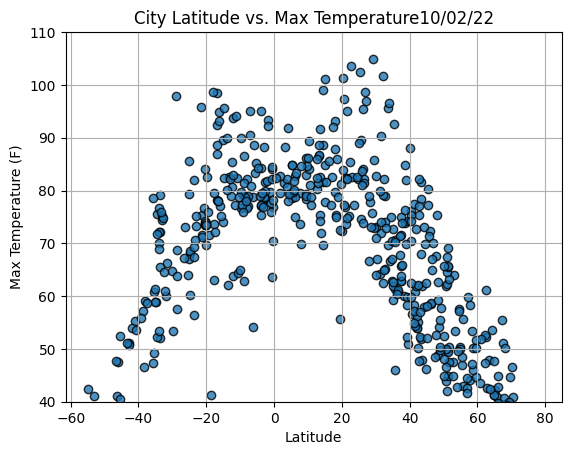

In [21]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temp,
           edgecolor="black",
           linewidths=1,
           marker='o',
           alpha=0.8,
           label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature"+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(40,110)
plt.grid(True)
plt.savefig("City Latitude vs. Max Temperature.png")


# Show the plot

plt.show()

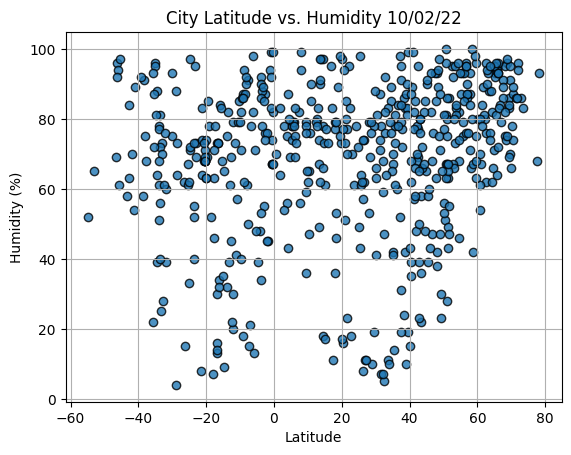

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

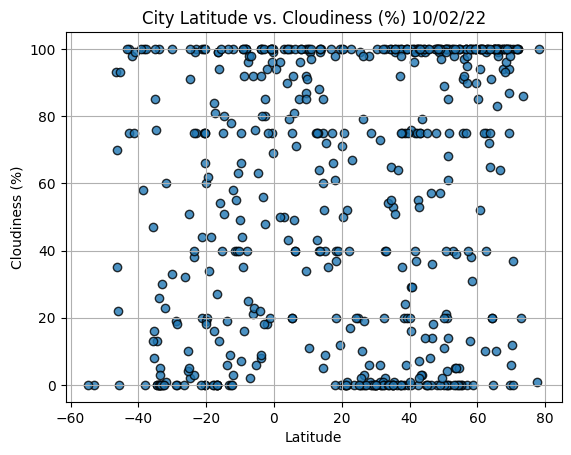

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City Latitude vs. Cloudiness (%).png")
plt.show()

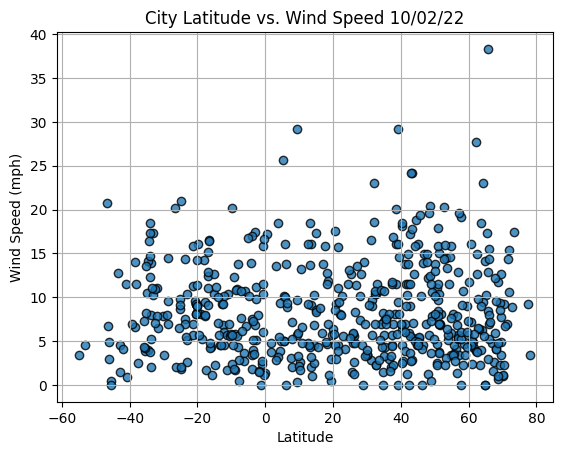

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City Latitude vs. Wind Speed.png")

# Show plot.
plt.show()

In [25]:
# Import linear regression from the SciPy stats module.

from scipy.stats import linregress

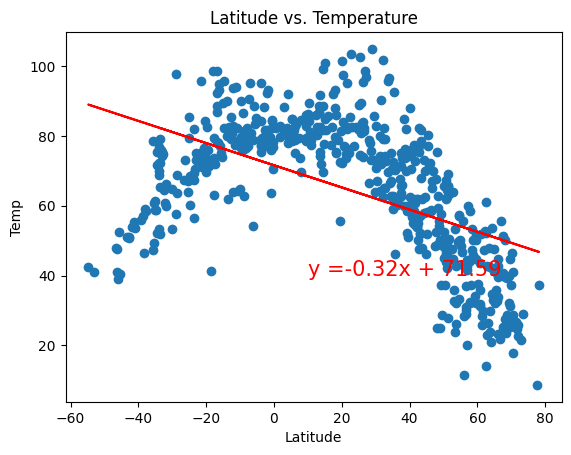

In [26]:
# Perform linear regression

(slope,intercept,r_value,p_value,std_err)=linregress(lats,max_temp)

# Calculate the regrssion line "y values" from the slope and intercept.
regress_values = lats*slope+intercept

# Get the equation of the line.

line_eq = "y =" + str(round(slope,2))+"x + "+str(round(intercept,2))

# Create a scatter plot of x and y values.

plt.scatter(lats,max_temp)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope,intercept,r_value,p_value,std_err)= linregress(lats,max_temp)
    # Calculate the regression line"y values from the slope and intercept
    
    regress_values = lats*slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y =" + str(round(slope,2))+"x + "+str(round(intercept,2))
    
    # Create a scatter plot
    plt.scatter(lats, max_temp)
    plt.plot(lats,regress_values,"r")
    
       # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    

In [28]:
index13 = city_data_df.loc[13]
index13

City                       Lieksa
Country                        FI
Date          2022-10-02 13:42:44
Lat                       63.3167
Lng                       30.0167
Max Temp                    47.91
Humidity                       88
Cloudiness                     72
Wind Speed                    2.3
Name: 13, dtype: object

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Severo-Kurilsk,RU,2022-10-02 13:42:40,50.6789,156.1250,43.83,67,21,11.07
3,Dikson,RU,2022-10-02 13:42:41,73.5069,80.5464,29.05,83,86,17.47
6,Fairbanks,US,2022-10-02 13:42:28,64.8378,-147.7164,41.31,94,100,0.00
8,Bereda,ES,2022-10-02 13:42:42,43.2686,-7.5406,78.42,58,100,2.84
9,Tuktoyaktuk,CA,2022-10-02 13:42:43,69.4541,-133.0374,26.60,86,100,12.66
...,...,...,...,...,...,...,...,...,...
546,Mokhsogollokh,RU,2022-10-02 13:57:10,61.4681,128.9203,25.83,78,100,5.82
548,Begunitsy,RU,2022-10-02 13:57:11,59.5855,29.3176,50.09,68,100,4.32
549,Nan,TH,2022-10-02 13:57:11,18.8333,100.6667,78.82,89,40,1.14
550,Okhotsk,RU,2022-10-02 13:54:05,59.3833,143.3000,34.14,98,100,6.06


In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Severo-Kurilsk,RU,2022-10-02 13:42:40,50.6789,156.1250,43.83,67,21,11.07
3,Dikson,RU,2022-10-02 13:42:41,73.5069,80.5464,29.05,83,86,17.47
6,Fairbanks,US,2022-10-02 13:42:28,64.8378,-147.7164,41.31,94,100,0.00
8,Bereda,ES,2022-10-02 13:42:42,43.2686,-7.5406,78.42,58,100,2.84
9,Tuktoyaktuk,CA,2022-10-02 13:42:43,69.4541,-133.0374,26.60,86,100,12.66


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

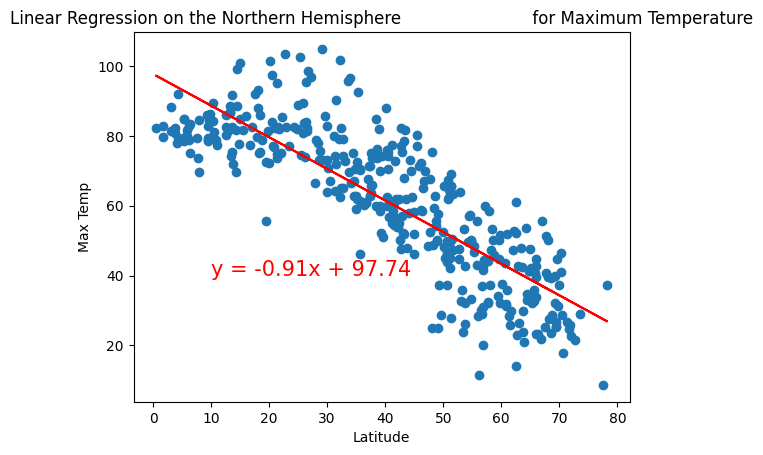

In [32]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    plt.show()

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

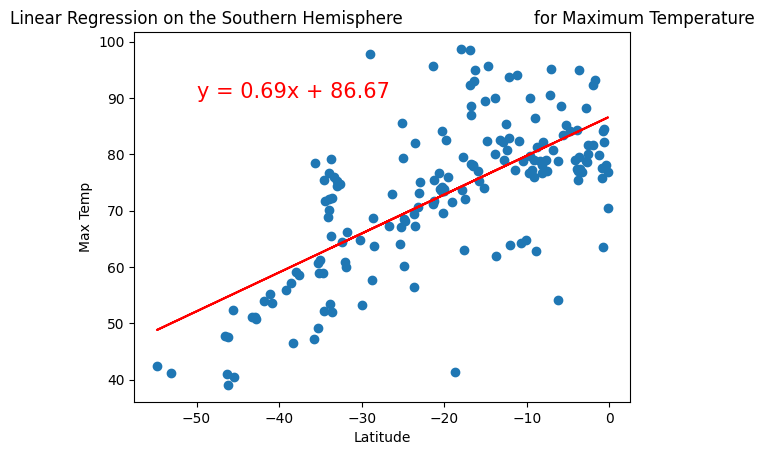

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

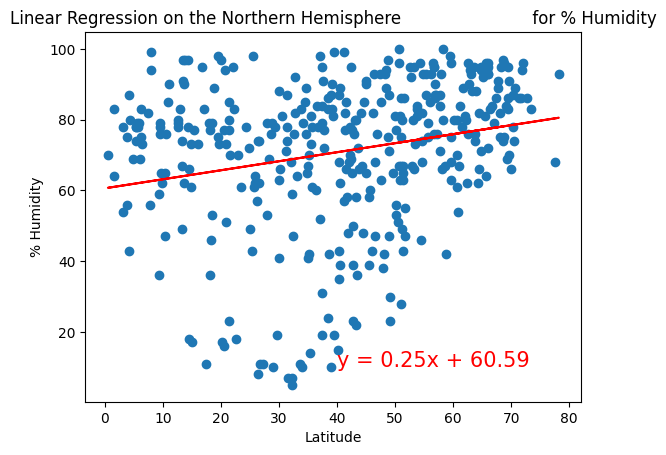

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

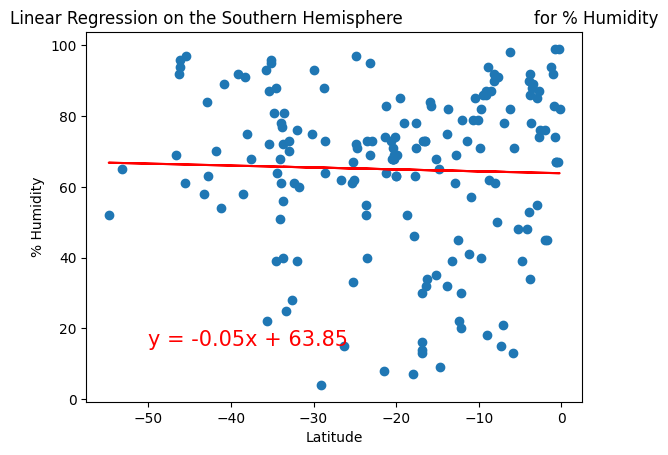

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

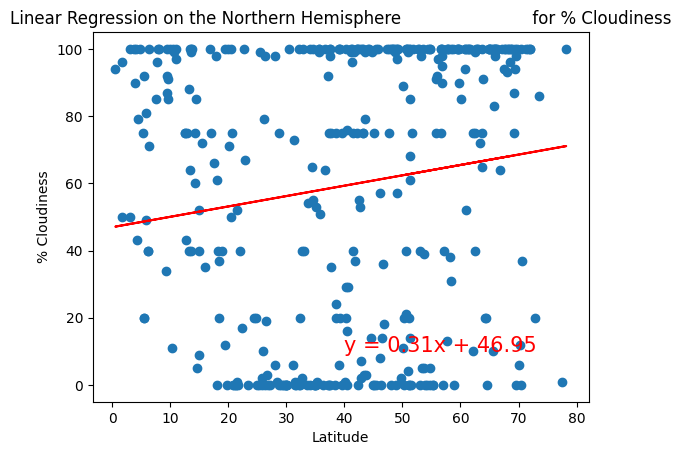

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

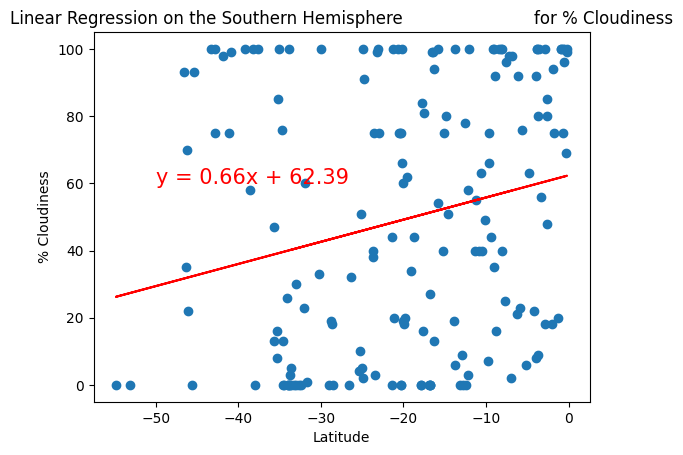

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

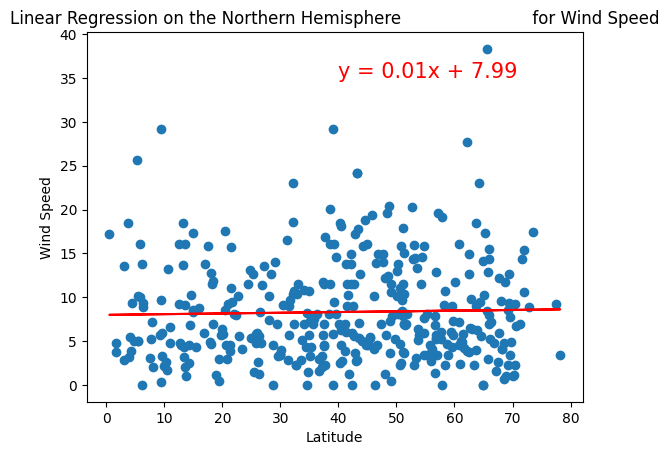

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

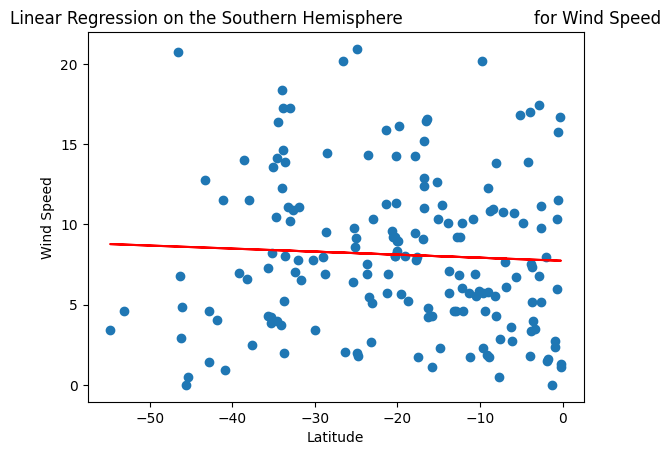

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))